In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
# import sumo as sm
import os
from traffic_initialization import *
import sys
from bs4 import BeautifulSoup
import tqdm

In [67]:
# initial xml encoding
minGap=3
N=300

test_name = 'test5'

filedir = './xml_data/' + test_name + '/'

netfile = test_name + '.net.xml'
routefile = test_name + '.rou.xml'
configfile = test_name + '.sumocfg'
outpufile = test_name + '.statistic.output.xml'

rtFl = RouteFile(filedir + routefile)

#1

vtype = 'id0'

rtFl.setVehicleType(vtype, {
'accel' : "3.0",
'decel' : "6.0",
'length' : "4.0",
'minGap' : str(minGap),
'maxSpeed' : "50.0",
'sigma' : "0"
})

rtFl.setVehicleFlow(vtype, source='E0', dest='E4', num=N, dur=100, speed=13.89)

#2

vtype = 'id1'

rtFl.setVehicleType(vtype, {
'accel' : "3.0",
'decel' : "6.0",
'length' : "4.0",
'minGap' : str(minGap),
'maxSpeed' : "50.0",
'sigma' : "0"
})

rtFl.setVehicleFlow(vtype, source='E0', dest='E12', num=N, dur=100, speed=13.89)

vtype = 'id2'

rtFl.setVehicleType(vtype, {
'accel' : "3.0",
'decel' : "6.0",
'length' : "4.0",
'minGap' : str(minGap),
'maxSpeed' : "50.0",
'sigma' : "0"
})

rtFl.setVehicleFlow(vtype, source='E0', dest='E14', num=N, dur=100, speed=13.89)


# #3

# vtype = 'id2'

# rtFl.setVehicleType(vtype, {
# 'accel' : "3.0",
# 'decel' : "6.0",
# 'length' : "4.0",
# 'minGap' : str(minGap),
# 'maxSpeed' : "50.0",
# 'sigma' : "0"
# })

# rtFl.setVehicleFlow(vtype, source='E13', dest='E4', num=N/2, dur=100, speed=13.89)

# #4

# vtype = 'id3'

# rtFl.setVehicleType(vtype, {
# 'accel' : "3.0",
# 'decel' : "6.0",
# 'length' : "4.0",
# 'minGap' : str(minGap),
# 'maxSpeed' : "50.0",
# 'sigma' : "0"
# })

#rtFl.setVehicleFlow(vtype, source='E13', dest='E12', num=N/2, dur=100, speed=13.89)


rtFl.save()

generateConfigFile(
filedir + configfile, 
netfile,
routefile,
output=['statistic', 'tripinfo']
)

loadConfig(filedir + test_name + '.sumocfg')
# xml reading
f_name = filedir + outpufile
with open(f_name, 'r') as file:
    data = file.read()
data = BeautifulSoup(data, "xml")
# average output flow is equal to N/T, where T – full model time
ans = float(data('vehicleTripStatistics')[0]['duration'])
#ans = N/float(data('performance')[0]['duration'])
print(ans)

Step #1287.00 (0ms ?*RT. ?UPS, vehicles TOT 900 ACT 0 BUF 0)                              
252.94


In [3]:
def loss(minGap, test_name, N, stat='mean'):

    if(test_name=='test1'):
        # initial xml encoding

        filedir = './xml_data/test1/'

        netfile = 'test1.net.xml'
        routefile = 'test1.rou.xml'
        configfile = 'test1.sumocfg'
        outpufile = 'test1.statistic.output.xml'

        rtFl = RouteFile(filedir + routefile)

        vtype = 'id0'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E3', num=N, dur=100, speed=30)
        rtFl.save()
            
    elif(test_name=='test4'):
        
        test_name = 'test4'

        filedir = './xml_data/' + test_name + '/'

        netfile = test_name + '.net.xml'
        routefile = test_name + '.rou.xml'
        configfile = test_name + '.sumocfg'
        outpufile = test_name + '.statistic.output.xml'

        rtFl = RouteFile(filedir + routefile)

        #1

        vtype = 'id0'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E4', num=N, dur=100, speed=13.89)

        #2

        vtype = 'id1'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E12', num=N, dur=100, speed=13.89)

        rtFl.save()
        
    elif(test_name=='test5'):

        filedir = './xml_data/' + test_name + '/'

        netfile = test_name + '.net.xml'
        routefile = test_name + '.rou.xml'
        configfile = test_name + '.sumocfg'
        outpufile = test_name + '.statistic.output.xml'

        rtFl = RouteFile(filedir + routefile)

        #1

        vtype = 'id0'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E4', num=N, dur=100, speed=13)

        #2

        vtype = 'id1'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E12', num=N, dur=100, speed=13)
        
        #3

        vtype = 'id2'

        rtFl.setVehicleType(vtype, {
        'accel' : "3.0",
        'decel' : "6.0",
        'length' : "4.0",
        'minGap' : str(minGap),
        'maxSpeed' : "50.0",
        'sigma' : "0"
        })

        rtFl.setVehicleFlow(vtype, source='E0', dest='E14', num=N, dur=100, speed=13)

        rtFl.save()

        
    if stat == 'mean':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['statistic']#, 'tripinfo']
        )

        loadConfig(filedir + test_name + '.sumocfg')
        # xml reading
        f_name = filedir + outpufile
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        # average output flow is equal to N/T, where T – full model time
        #ans = float(data('vehicleTripStatistics')[0]['duration'])
        ans = N/float(data('performance')[0]['duration'])

        return ans

    elif stat == 'median':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['tripinfo']
        )

        loadConfig(filedir + test_name + '.sumocfg')
        # xml reading
        f_name = filedir + test_name + '.tripinfo.output.xml'
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")

        arr = []
        for sruct in data('tripinfo'):
            arr.append(float(sruct['arrival']))

        n = 5
        arr = np.array(arr)
        step = max(arr)/n
        rates = []
        for i in range(n):
            temp = arr[arr > i*step]
            temp = temp[temp <= (i+1)*step]
            rates.append(temp.size)
        return np.median(rates)


    elif stat == 'car_time':
        generateConfigFile(
        filedir + configfile, 
        netfile,
        routefile,
        output=['tripinfo']
        )

        loadConfig(filedir + test_name + '.sumocfg')
        # xml reading
        f_name = filedir + outpufile
        with open(f_name, 'r') as file:
            data = file.read()
        data = BeautifulSoup(data, "xml")
        # average output flow is equal to N/T, where T – full model time
        ans = float(data('vehicleTripStatistics')[0]['duration'])
        
        return 1/ans
    
    else:
        raise Exception('Undefined statistics!')

In [4]:
loss(3.8, 'test5', 250)

0.23651844843897823

In [72]:
# graphs

X = np.linspace(0, 8, 300)
Y = np.zeros(X.shape[0])

for i in tqdm.tqdm(range(X.shape[0])):
    
    Y[i] = loss(X[i], 'test4', 250)

In [70]:
np.savez('res_data/' + 'test4_3', X=X, Y=Y, N = 250, speed=30, maxspeed=50)

Text(0, 0.5, 'throughput')

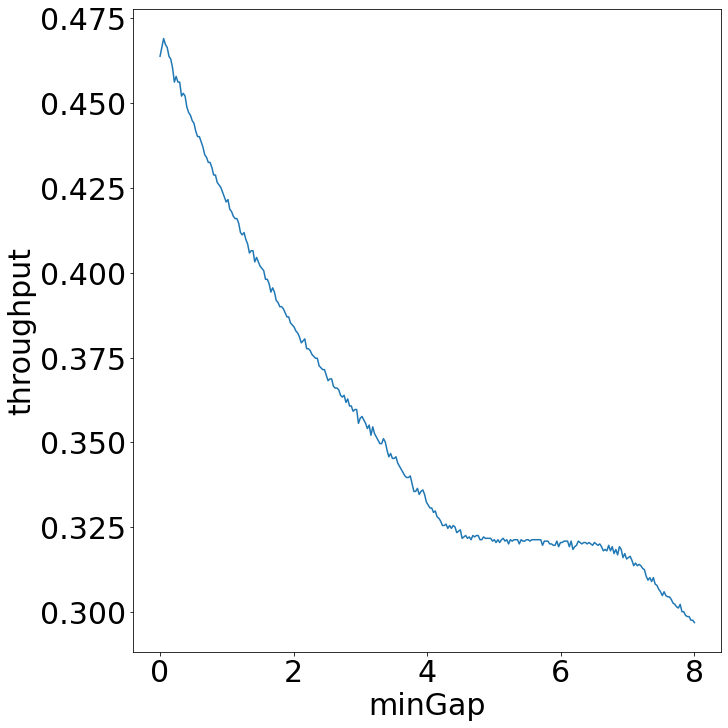

In [71]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


Text(0, 0.5, 'throughput')

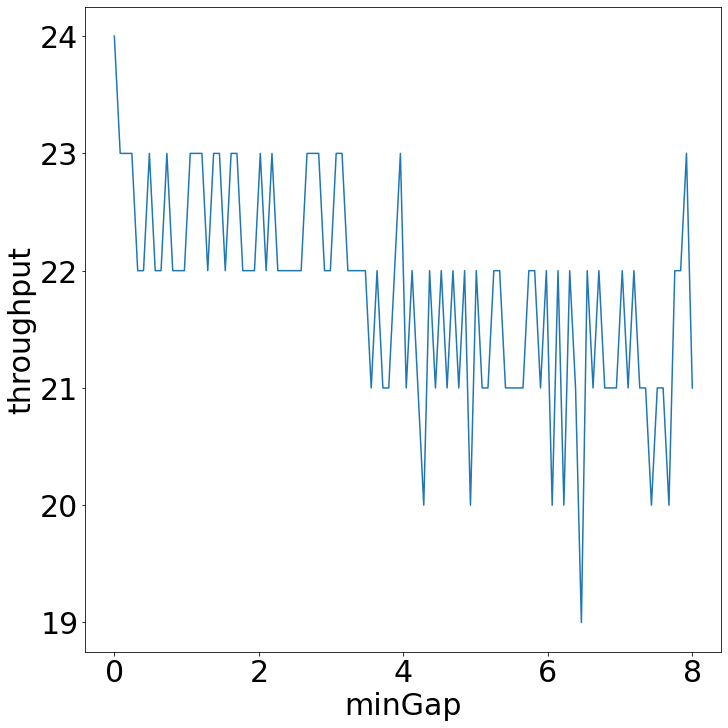

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


In [ ]:
# simple optimization

bounds = (, )

sol = sc.optimize.dual_annealing(loss, bounds=[bounds], args=['road', inflow], maxiter=200)
ans = sol.x

TypeError: dual_annealing() got multiple values for argument 'bounds'

In [6]:
# предыдущее, у меня не работает, это, вроде работает
def inverse_loss(minGap: float, test_name: str, N:int, stat:str='mean') -> float:
    # print(minGap)
    return -loss(minGap, test_name, N, stat=stat)
    # return (minGap - 10)**2 + 1

def dumb_best_dist(test_name: str, n_cars: int) -> float:
    ans = sc.optimize.minimize(inverse_loss, 0.5, args=(test_name, n_cars), bounds=[(0.0, None)])
    print(ans)

dumb_best_dist('test5', 250)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.23651844843897823
        x: [ 5.000e-01]
      nit: 0
      jac: [ 0.000e+00]
     nfev: 2
     njev: 1
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


# Намашинлерним говна?

In [51]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
# smart ml optimization?
class OptinalDist():

    def __init__(self, n_estimators:int = 100, max_depth: int = 3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.hasFit = False

    def fit(self, test_name:str) -> None:
        """
        Обучает модель под дорогу
        """
        self.test_name = test_name
        min_n_cars = 50
        max_n_cars = 100
        cars_step = 50
        min_dist = 0
        max_dist = 10
        dist_step = 1
        X = pd.DataFrame({"n_cars": []})
        y = pd.Series(name="best_dist")

        for n_cars in range(min_n_cars, max_n_cars, cars_step):
            max_loss = -1.0
            best_dist = -1.0
            for dist in np.arange(min_dist, max_dist, dist_step):
                loss_res = loss(dist, self.test_name, n_cars)
                if loss_res > max_loss:
                    max_loss = loss_res
                    best_dist = dist
            X.loc[len(X)] = n_cars
            y.loc[len(y)] = best_dist
        
        self.reg = GradientBoostingRegressor(n_estimators=self.n_estimators, max_depth=self.max_depth)
        self.reg.fit(X, y)
        self.hasFit = True

    def predict(self, n_cars:int | np.ndarray) -> float | np.ndarray:
        """
        Предсказывает наилучшую дистанцию для заданного числа машин
        """
        assert self.hasFit, "You should fit model first"
        y = np.array(n_cars).reshape(-1, 1)
        y = y.reshape(len(y), -1)
        return self.reg.predict(y)

In [111]:
obj = OptinalDist()
obj.fit('test5')

In [112]:
print(obj.predict([50, 60, 70]))
print(obj.predict(100))

[0. 0. 0.]
[0.]


C:\Users\Saviery\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Saviery\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [65]:
# Определение функции потерь
def model_loss(dist, n):
    # return inverse_loss(dist, 'test5', n)
    return (2 * dist - n)**2 + 1.0  # ваша функция потерь

# Параметры для Q-обучения
alpha = 0.1  # шаг обучения (learning rate)
gamma = 0.9  # дисконт-фактор
epsilon = 0.1  # эпсилон для epsilon-greedy стратегии
max_step_in_episode = 100

# Инициализация Q-таблицы
max_n_value = 10
max_dist_value = 10
Q = np.zeros((max_n_value, max_dist_value))  # задайте максимальные значения для n и dist

def get_new_state(current_state, action):
    new_state = (current_state + action) % max_n_value
    return new_state

# Тренировка модели
num_episodes = 1000  # количество эпох
for episode in range(num_episodes):
    # В начале каждой эпохи начальные параметры
    n = max_n_value // 2
    state = n
    total_reward = 0
    
    for i in range(max_step_in_episode):
        # Выбор действия (dist) с помощью epsilon-greedy стратегии
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, max_dist_value)
        else:
            action = np.argmax(Q[state, :])
        
        # Выполнение действия
        dist = action
        reward = -model_loss(dist, n)  # награда -значение функции потерь
        
        # Вычисление нового состояния
        new_n = get_new_state(state, action)  # формируем новое значение n
        
        # Обновление Q-таблицы
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[new_n, :]))
        
        # Переход к новому состоянию
        state = new_n
        n = new_n
        total_reward += reward
    
    print(f"Episode {episode}, Total Reward: {total_reward}")

# Получение оптимального значения dist при заданном n
def get_optimal_dist(n):
    return np.argmax(Q[n, :])

In [139]:
# ВНИМАНИЕ тут создается лосс без названия дороги
def make_loss_for_model(test_name:str) -> callable:
    def tmp_func(dist, inflow):
        return loss(dist, test_name, inflow)
    return tmp_func

# например вы хотите лосс для 5-ого теста, тогда просто используйте
use_this_loss = make_loss_for_model('test5')
use_this_loss(3.8, 250)

0.23651844843897823

In [1]:
from model import OptimalLoss_Q, OptimalDist

In [ ]:
"""
Как работать с моделями
1) Для начала надо их заимпортить, используйте код выше.
OptimalLoss_Q - подобие обучения с подкреплением
OptimalDist   - бустинг, который обучается на том, что посчитал

2) Потом надо создать объект с нужной Вам сеткой. Что такое сетка?
Это значения количества машин и мощностей потоков, которые будут использоваться для обучения.

Их формат: grid_params = [(min_dist, max_dist, dist_step), (min_inflow, max_inflow, inflow_step)], можете юзать другие контейнеры, наверное, не сломается, но это не точно

Чем меньше узлов в сетке, тем быстрее обучится модель
Зачем Вам это знать?
Да потому, что если Вы попросите предсказать что-то для данных, не лежащих в сетке, модель высрет хуйню :)

Поэтому ВЫБЕРЕТЕ MIN И MAX для КАЖДОГО параметра, их всего два, это не сложно, наверное
ШАГ параметра выбирайте относительно скорости работы, если считается уже 5 мин, то можно увеличить шаг

3) Oбучите модель с помощью метода fit
На вход отдайте ему make_loss_for_model('ИМЯ_ТЕСТА')
Например, obj.fit(make_loss_for_model('test_name'))

4) Сходите отдохнуть, пока модель обучается

5) Когда модель обучилась, ее можно попросить что-то предсказать с помощью метода predict
На вход скормите ему значение потока (inflow)
Например, obj.predict(some_inflow)

6) Наслаждайтесь ответом



Если что-то пойдет не так или появится какой-то error, я не виноват, это все Артем, пишите ему
"""

'\nКак работать с моделями\n1) Для начала надо их заимпортить, используйте код выше.\n\n2) Потом надо создать объект с нужной Вам сеткой. Что такое сетка?\nЭто значения количества машин и мощностей потоков, которые будут использоваться для обучения.\n\nИх формат: grid_params = [(min_dist, max_dist, dist_step), (min_inflow, max_inflow, inflow_step)], можете юзать другие контейнеры, наверное, не сломается, но это не точно\n\nЧем меньше узлов в сетке, тем быстрее обучится модель\nЗачем Вам это знать?\n'

In [11]:
# Example
grid_params = [(0, 11, 0.5), (50, 151, 25)]  # сначала дистанция машин, потом поток
obj = OptimalDist(grid_params=grid_params)
obj.fit(make_loss_for_model('test'))
obj.predict(75)